In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


# Dimensionality Reduction

Dimensionality reduction is a set of techniques in machine learning for reducing the number of input variables (features) while retaining as much important information as possible. Benefits include simpler models, lower computational cost, reduced overfitting, and improved visualization and interpretability — especially for very high-dimensional data (the "curse of dimensionality").

## Principal Component Analysis (PCA)

**What it does**
- Transforms correlated features into a set of new, uncorrelated features called *principal components*.
- The first principal component captures the largest possible variance; each subsequent component captures the next largest variance under orthogonality constraints.

**How it works (overview)**
1. Standardize the data (zero mean, unit variance).
2. Compute the covariance matrix.
3. Compute eigenvectors (directions) and eigenvalues (variance explained).
4. Sort components by explained variance and select the top N components.
5. Project the original data onto the selected components.

**Result**
- You can often keep only the first few principal components that explain most of the variance, reducing dimensionality with minimal information loss.

## Example
If a dataset has 10 features but 2 principal components explain 90% of the variance, you can reduce the dataset to these 2 dimensions for visualization or downstream tasks while preserving most of the signal.

## Benefits and Trade-offs

Benefits:
- Simplifies data and speeds up algorithms.
- Removes noise and redundancy.
- Helps visualize complex data.

Downsides:
- Some information loss is possible.
- Principal components are linear combinations of original features and may be hard to interpret.


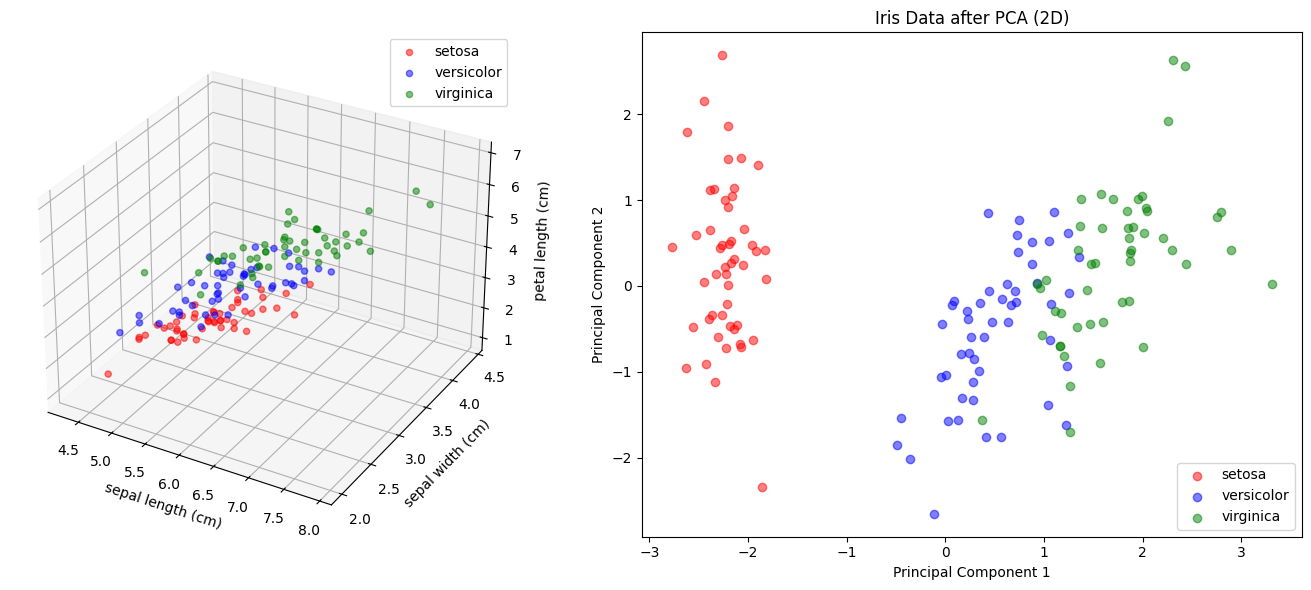

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
x_data = iris.data
y_data = iris.target
x_features = iris.feature_names
y_features = iris.target_names

scaler  = StandardScaler()
x_scaled = scaler.fit_transform(x_data)

fig = plt.figure(figsize =(14,6))
ax = fig.add_subplot(121,projection='3d')
for target,color,label in zip(np.unique(y_data),['r','b','g'],y_features):
    ax.scatter(x_data[y_data == target, 0], x_data[y_data==target, 1], x_data[y_data ==target, 2], color=color, label=label, alpha=0.5)
ax.set_xlabel(x_features[0])
ax.set_ylabel(x_features[1])
ax.set_zlabel(x_features[2])
ax.legend()

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

ax1 = fig.add_subplot(122)
for target ,color,label in zip(np.unique(y_data),['r','b','g'],y_features):
    ax1.scatter(x_pca[y_data == target,0],x_pca[y_data==target, 1], color=color, label=label, alpha=0.5)
plt.title('Iris Data after PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()


# t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is a non-linear dimensionality reduction technique mainly used for visualizing high-dimensional data in 2D or 3D.

**It is especially useful for:**

1. Understanding clusters

2. Visualizing embeddings

3. Exploring structure in high-dimensional datasets
(ex: images, text embeddings, MNIST, face embeddings, etc.)

## Why do we use t-SNE?

Because high-dimensional data (50–1000+ features) is impossible to visualize.

**t-SNE reduces it to 2D/3D while preserving:** 

✔ Local structure (points close → stay close)
✔ Clusters
✔ Complex non-linear relationships

## How t-SNE Works (Simple Explanation)

1. In high-dimensional space:

 1. It finds how similar two data points are.

 2. Uses Gaussian distribution to compute similarity.

2. In low-dimensional space (2D/3D):

 1. It tries to place points such that similar points stay close.

 2. Uses t-distribution (heavy-tailed) to avoid crowding.

3. Optimizes a cost function (KL divergence)

 1. Minimizes the difference between high-dimensional and low-dimensional similarity.

## When to Use t-SNE

Use t-SNE when:

1. You want to visualize clusters.

2. Dataset is high-dimensional (like embeddings).

3. You want to inspect if features separate classes.

4. Doing EDA before model building.

**Don't use t-SNE for:**

1. Classification/regression.

2. Very large datasets (slow).

3. Real-time applications.

## t-SNE Limitations

1.  Slow for large data.

2. Not deterministic (different results each run unless random_state is fixed).

3. Does not preserve global distances.

4. Only for visualization, not for ML model training.

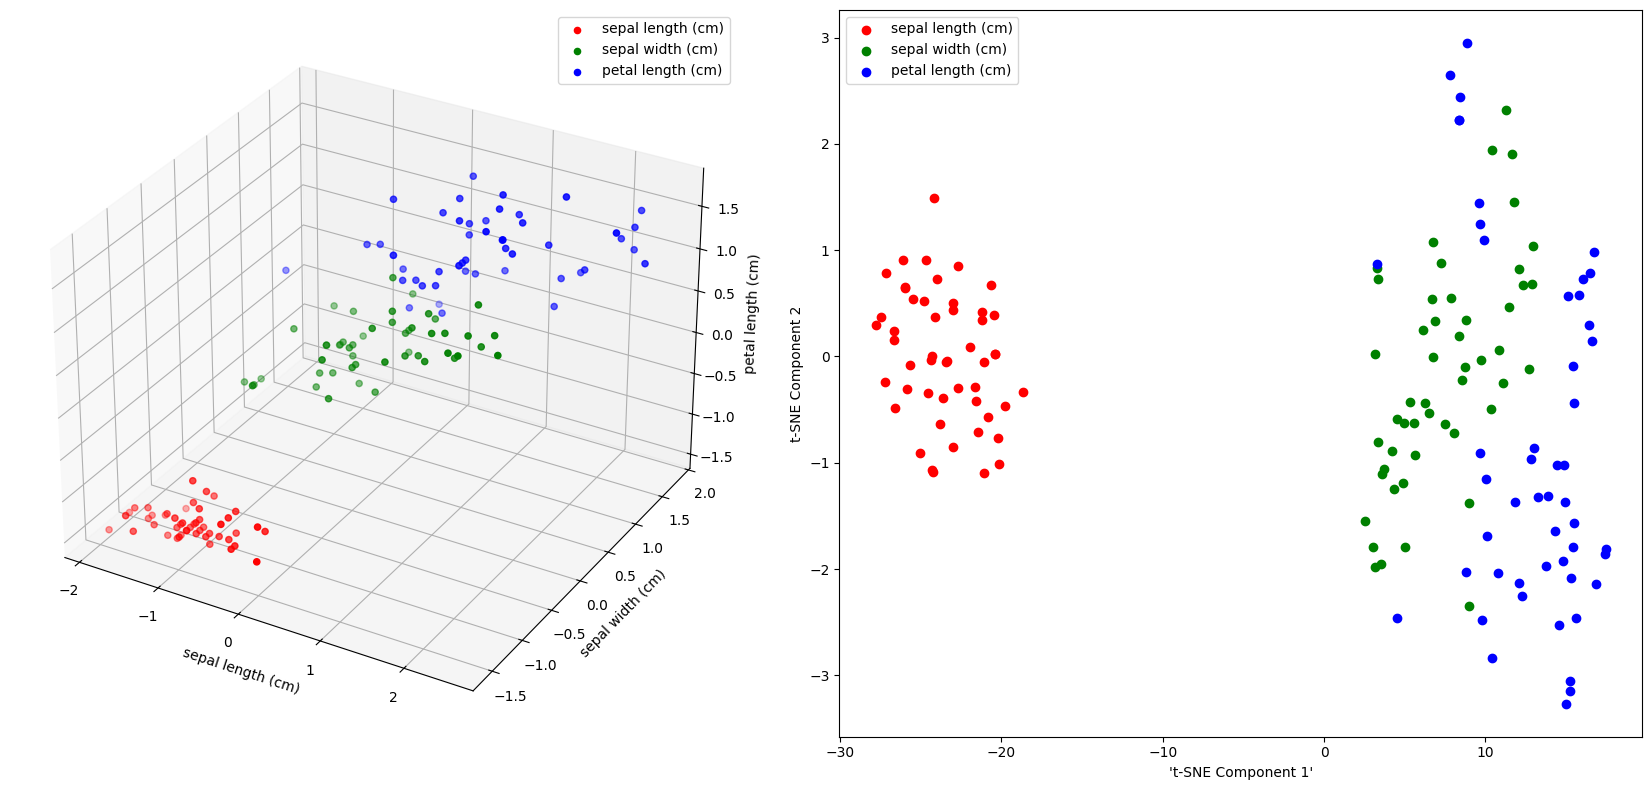

In [5]:
from sklearn.manifold import TSNE

iris = load_iris()


x_data = iris.data
y_data = iris.target
target_names = iris.target_names
features = iris.feature_names

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)

tsn_model = TSNE(n_components=2,random_state=44)
x_tsne = tsn_model.fit_transform(x_scaled)

fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(121,projection='3d')

for target, color,lable in zip(np.unique(y_data),['r','g','b'],features):
    ax.scatter(x_scaled[y_data ==target,0],x_scaled[y_data ==target,2],x_scaled[y_data ==target,3],color=color,label=lable)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.legend()

ax1 = fig.add_subplot(122)
for target, color,lable in zip(np.unique(y_data),['r','g','b'],features):
    ax1.scatter(x_tsne[y_data ==target,0],x_tsne[y_data ==target,1],color=color,label=lable)
ax1.set_xlabel("'t-SNE Component 1'")
ax1.set_ylabel("t-SNE Component 2")
ax1.legend()

plt.tight_layout()
plt.show()



#  Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a **supervised** dimensionality reduction and classification technique used to project high-dimensional data into a lower-dimensional space while **maximizing class separability**.

---

##  Key Ideas

- **Supervised** → uses class labels.
- Unlike PCA (unsupervised), LDA tries to:
  - Maximize **between-class variance**.
  - Minimize **within-class variance**.
- Helps improve:
  - Classification performance.
  - Visualization of labeled data.
  - Feature reduction.

---

## What LDA Does

LDA finds a new feature space where:

- Points from the **same class** become closer.
- Points from **different classes** become farther apart.

It does this by projecting data onto one or more **linear discriminants** (directions that best separate the classes).

---

## 🔢 How LDA Works (Step-by-Step)

1. **Compute class means**  
   - Compute the mean vector for each class.

2. **Compute scatter matrices**
   - **Within-class scatter** \(S_W\): how much points vary *inside* each class.
   - **Between-class scatter** \(S_B\): how far class means are from each other.

3. **Solve the generalized eigenvalue problem**  
   - Find directions that maximize the ratio:
     \[
     \frac{\lvert S_B \rvert}{\lvert S_W \rvert}
     \]
   - These directions correspond to eigenvectors with the largest eigenvalues.

4. **Select top eigenvectors (discriminants)**
   - Choose the top \(k\) eigenvectors.
   - These form the new lower-dimensional feature space.

5. **Project data**
   - Transform original data onto this new subspace.

---

## 🧮 When to Use LDA

Use LDA when:

- You have **labeled data** (supervised learning).
- You want **dimensionality reduction** plus **better class separation**.
- You want to:
  - Improve classification performance.
  - Visualize data in 2D or 3D.
- Data is **approximately linearly separable**.

Avoid LDA when:

- Data is **not normally distributed**.
- Classes have **very different covariance structures**.
- You need **nonlinear decision boundaries** (consider kernel methods or other nonlinear techniques).

---

## 🆚 PCA vs LDA

| Feature       | PCA                        | LDA                          |
|--------------|----------------------------|------------------------------|
| Type         | Unsupervised               | Supervised                   |
| Objective    | Maximize **variance**      | Maximize **class separation**|
| Uses labels? | ❌ No                       | ✔ Yes                        |
| Best for     | General feature reduction  | Classification + reduction   |

---



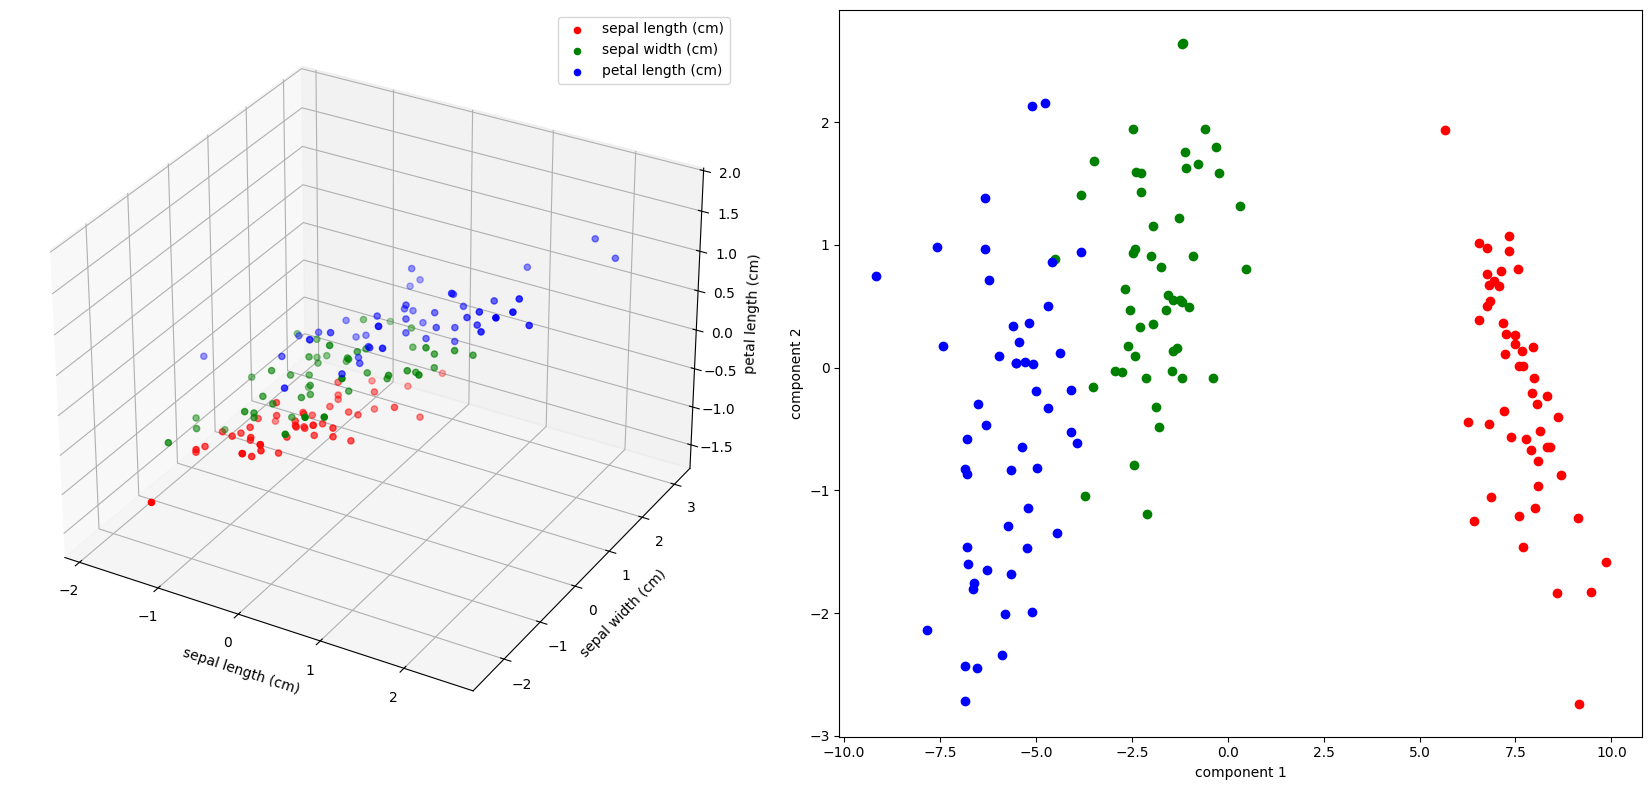

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
x = iris.data
y = iris.target
features = iris.feature_names


x_scaled= StandardScaler().fit_transform(x)
x_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(x_scaled,y)

fig = plt.figure(figsize=(17,8))
ax2 = fig.add_subplot(121,projection='3d')
for target,color, label  in zip(np.unique(y),['r','g','b'],features):
    ax2.scatter(x_scaled[y==target,0],x_scaled[y==target,1],x_scaled[y==target,2],color=color,label=label)
ax2.set_xlabel(features[0])
ax2.set_ylabel(features[1])
ax2.set_zlabel(features[2])
ax2.legend()

ax3 = fig.add_subplot(122)
for target,color, label  in zip(np.unique(y),['r','g','b'],features):
    ax3.scatter(x_lda[y==target,0],x_lda[y==target,1],color=color,label=label)
ax3.set_xlabel("component 1")
ax3.set_ylabel("component 2")

plt.tight_layout()

plt.show()